# Delhi Metro Network Analysis and Optimization 

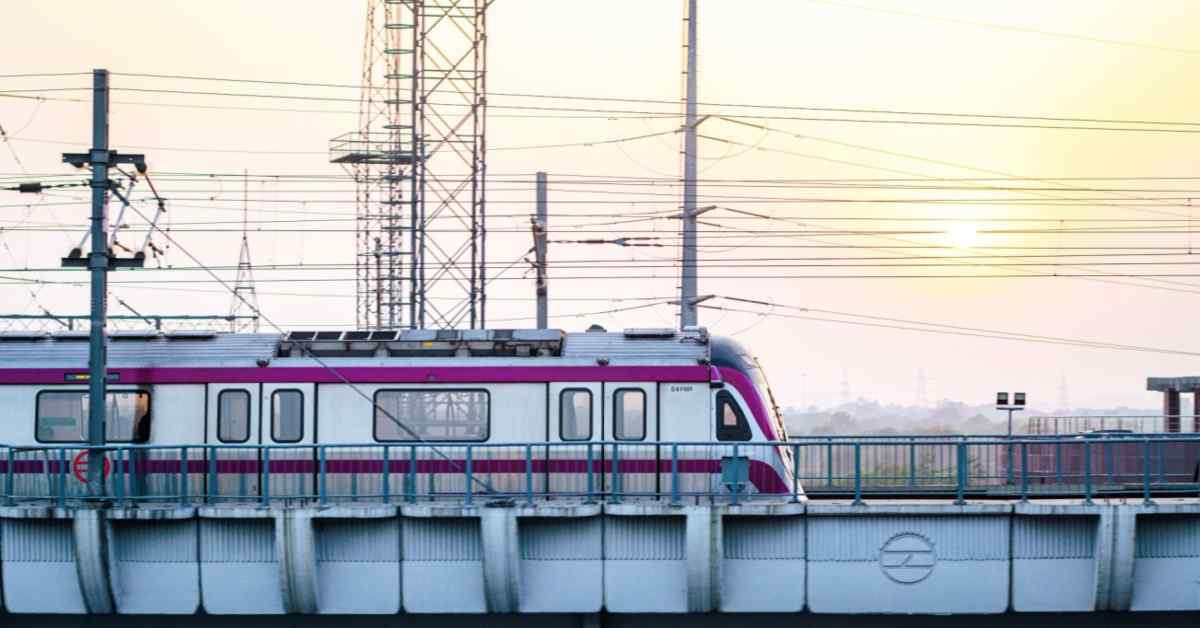

## Importing Basic Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install folium

In [6]:
!pip install -U kaleido

In [7]:
import pandas as pd
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

metro_data = pd.read_csv("Delhi-Metro-Network.csv")

In [8]:
metro_data

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054


## Data Preprocessing and Exploration

In [10]:
# checking for missing values
missing_values = metro_data.isnull().sum()

# checking data types
data_types = metro_data.dtypes

missing_values

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [11]:
# converting 'Opening Date' to datetime format
metro_data['Opening Date'] = pd.to_datetime(metro_data['Opening Date'])

In [12]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Station ID                285 non-null    int64         
 1   Station Name              285 non-null    object        
 2   Distance from Start (km)  285 non-null    float64       
 3   Line                      285 non-null    object        
 4   Opening Date              285 non-null    datetime64[ns]
 5   Station Layout            285 non-null    object        
 6   Latitude                  285 non-null    float64       
 7   Longitude                 285 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 17.9+ KB


### Number of Metro Stations Opened Each Year in Delhi

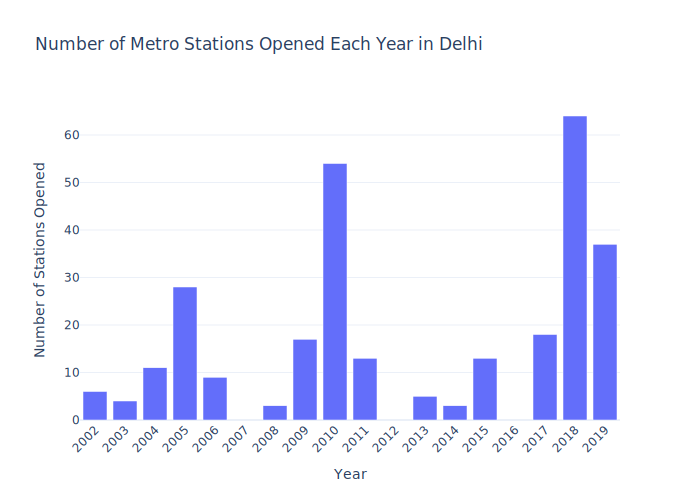

In [14]:
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year

# counting the number of stations opened each year
stations_per_year = metro_data['Opening Year'].value_counts().sort_index()

stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']

fig = px.bar(stations_per_year_df, x='Year', y='Number of Stations',
             title="Number of Metro Stations Opened Each Year in Delhi",
             labels={'Year': 'Year', 'Number of Stations': 'Number of Stations Opened'})

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickmode='linear'),
                  yaxis=dict(title='Number of Stations Opened'),
                  xaxis_title="Year")

fig.show("svg")

The bar chart illustrates the number of Delhi Metro stations opened each year. This visualization helps us understand the temporal development of the metro network. Some key observations include: **Some years show a significant number of new station openings, indicating phases of rapid network expansion.
Conversely, there are years with few or no new stations, which could be due to various factors like planning, funding, or construction challenges.**


In [15]:
stations_per_line = metro_data['Line'].value_counts()

# calculating the total distance of each metro line (max distance from start)
total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].max()

avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Average Distance Between Stations (km)': avg_distance_per_line
})

# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)
line_analysis

,Line,Number of Stations,Average Distance Between Stations (km)
0,Blue line,49,1.355000
1,Pink line,38,1.097917
2,Yellow line,37,1.157143
3,Voilet line,34,1.950000
4,Red line,29,1.240000
5,Magenta line,25,1.050000
6,Aqua line,21,1.379167
7,Green line,21,4.160000
8,Rapid Metro,11,1.421622
9,Blue line branch,8,1.000000


## Metro Line Analysis

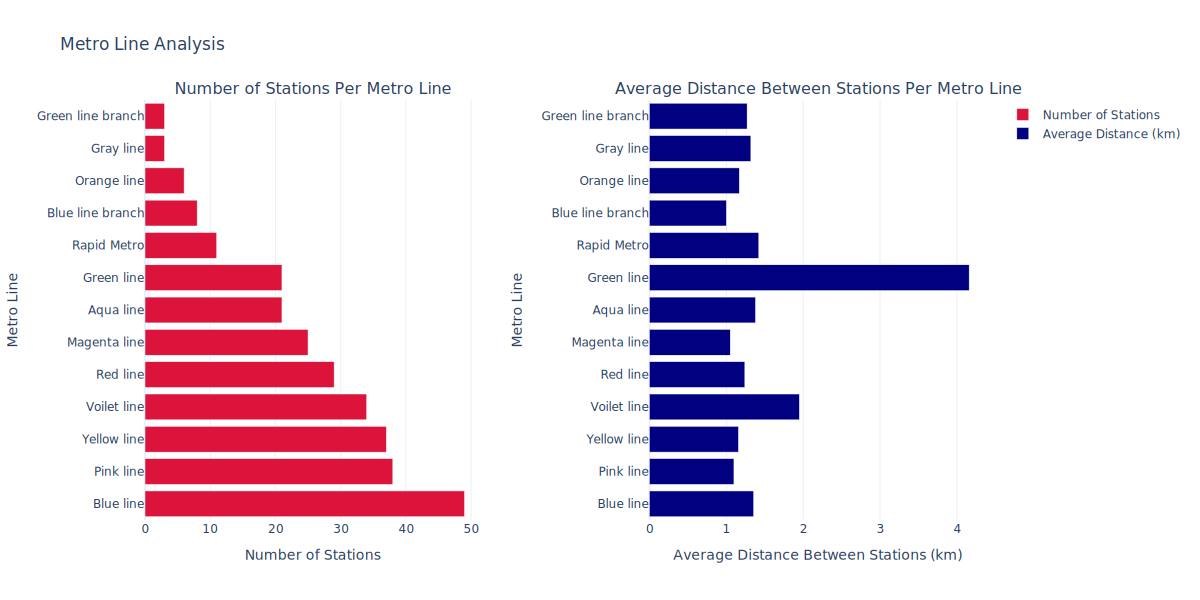

In [75]:
# creating subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of Stations Per Metro Line',
                                                    'Average Distance Between Stations Per Metro Line'),
                    horizontal_spacing=0.2)

# plot for Number of Stations per Line
fig.add_trace(
    go.Bar(y=line_analysis['Line'], x=line_analysis['Number of Stations'],
           orientation='h', name='Number of Stations', marker_color='crimson'),
    row=1, col=1
)

# plot for Average Distance Between Stations
fig.add_trace(
    go.Bar(y=line_analysis['Line'], x=line_analysis['Average Distance Between Stations (km)'],
           orientation='h', name='Average Distance (km)', marker_color='navy'),
    row=1, col=2
)

# update xaxis properties
fig.update_xaxes(title_text="Number of Stations", row=1, col=1)
fig.update_xaxes(title_text="Average Distance Between Stations (km)", row=1, col=2)

# update yaxis properties
fig.update_yaxes(title_text="Metro Line", row=1, col=1)
fig.update_yaxes(title_text="Metro Line", row=1, col=2)

# update layout
fig.update_layout(height=600, width=1200, title_text="Metro Line Analysis", template="plotly_white")

fig.show("svg")

**One for the number of stations per line and another for the average distance between stations.**

## Distribution of Delhi Metro Station Layouts

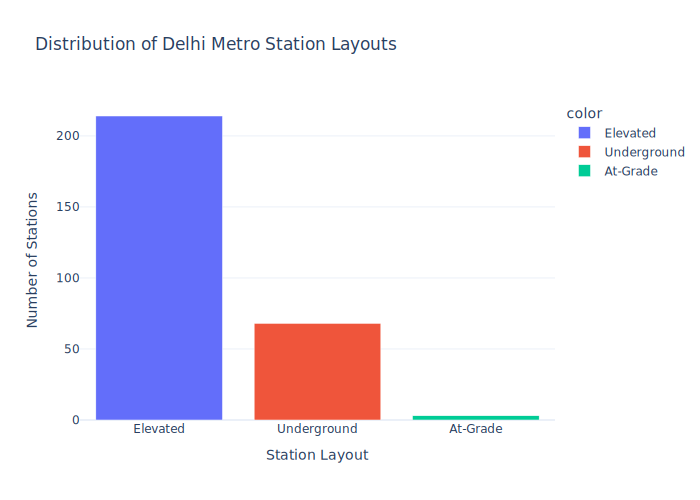

In [83]:
layout_counts = metro_data['Station Layout'].value_counts()

# creating the bar plot using Plotly
fig = px.bar(x=layout_counts.index, y=layout_counts.values,
             labels={'x': 'Station Layout', 'y': 'Number of Stations'},
             title='Distribution of Delhi Metro Station Layouts',
             color=layout_counts.index,
             color_continuous_scale='pastel')

# updating layout for better presentation
fig.update_layout(xaxis_title="Station Layout",
                  yaxis_title="Number of Stations",
                  coloraxis_showscale=False,
                  template="plotly_white")

fig.show("svg")

**The bar chart and the counts show the distribution of different station layouts in the Delhi Metro network.**

# Advance Exploration and Optimization

In [21]:
agency = pd.read_csv('agency.txt')
calendar = pd.read_csv('calendar.txt')
routes = pd.read_csv('routes.txt')
shapes = pd.read_csv('shapes.txt')
stop_times = pd.read_csv('stop_times.txt')
stops = pd.read_csv('stops.txt')
trips = pd.read_csv('trips.txt')

## Geographical Distribution of Delhi Metro

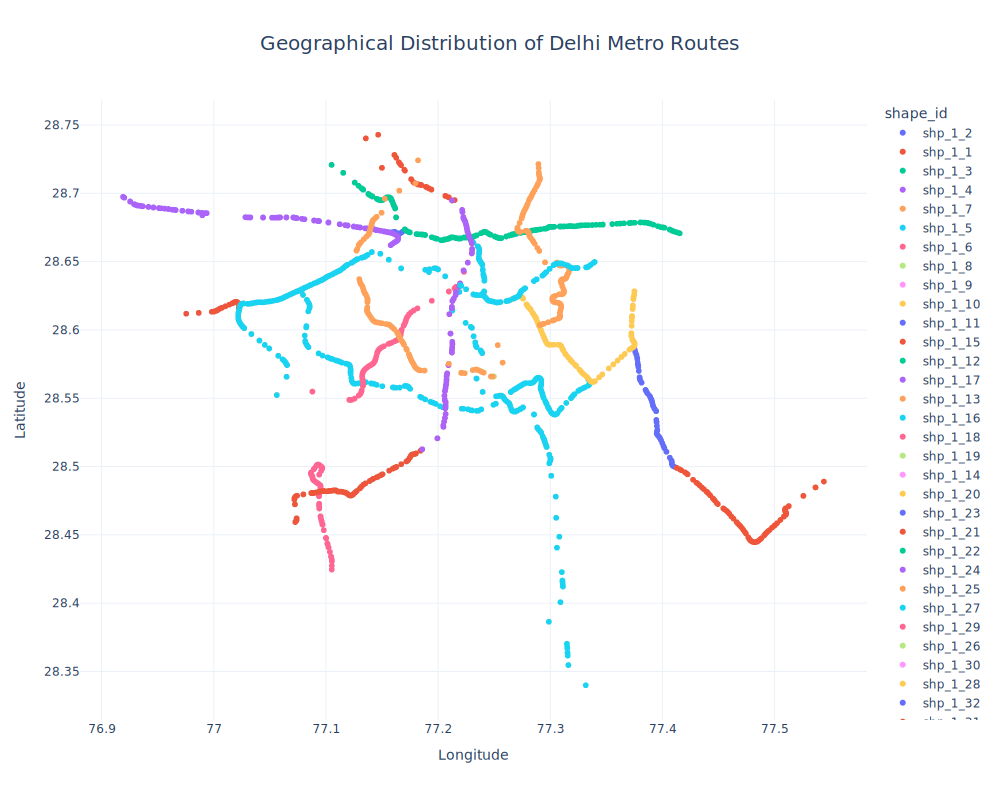

In [23]:
fig = px.scatter(
    shapes,
    x='shape_pt_lon',
    y='shape_pt_lat',
    color='shape_id',
    color_continuous_scale='viridis',  # Color scale for the hue
    labels={'shape_pt_lon': 'Longitude', 'shape_pt_lat': 'Latitude'},
    title='Geographical Distribution of Delhi Metro Routes',
    height=800,  # Adjust the height to match the figsize
    width=1000   # Adjust the width to match the figsize
)

# Update layout to add gridlines
fig.update_layout(
    xaxis_title='Longitude',
    yaxis_title='Latitude',
    title_x=0.5,  # Center the title
    title_font=dict(size=20),  # Increase font size for the title
    template='plotly_white'  # Choose a clean template
)

fig.show("svg")

**The map visualization shows the geographical paths of the Delhi Metro routes. Each line (identified by a unique colour) represents the path of a different route defined in the shapes dataset. This visual helps to understand how the Metro covers the geographical area of Delhi, demonstrating the connectivity and spread of the network.**

## Number of Trips per Day of the Week

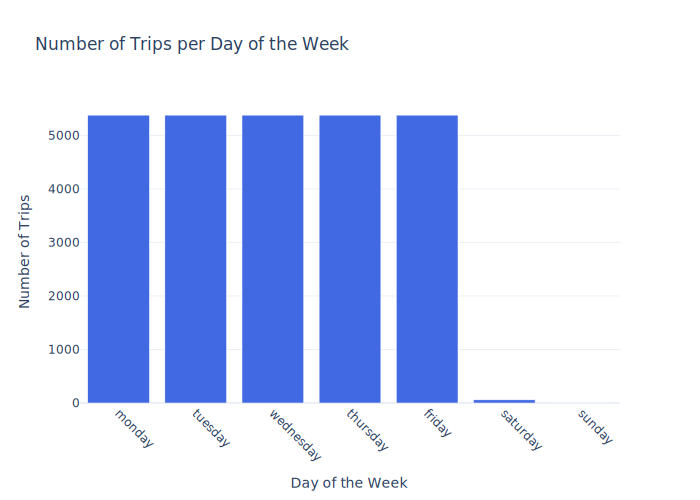

In [25]:
trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

trip_counts = trips_calendar[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()


fig = go.Figure()

fig.add_trace(go.Bar(
    x=trip_counts.index,
    y=trip_counts.values,
    marker=dict(color='royalblue')
))

fig.update_layout(
    title='Number of Trips per Day of the Week',
    xaxis_title='Day of the Week',
    yaxis_title='Number of Trips',
    xaxis=dict(tickmode='array', tickvals=trip_counts.index, tickangle=45),
    template='plotly_white',  # for a clean look
    showlegend=False
)

fig.show("svg")

**The bar chart illustrates the number of trips scheduled for each day of the week for the Delhi Metro. As we can see, the number of trips from Monday to Friday is consistent, indicating a stable weekday schedule designed to accommodate regular commuter traffic. In contrast, the trips decrease slightly on Saturday and even more on Sunday, reflecting lower demand or a reduced service schedule on weekends.**

**This finding suggests that the Delhi Metro strategically scales its operations based on the expected daily ridership, which likely peaks during weekdays due to work and school commutes.**

## Number of Routes per Metro Stop in Delhi

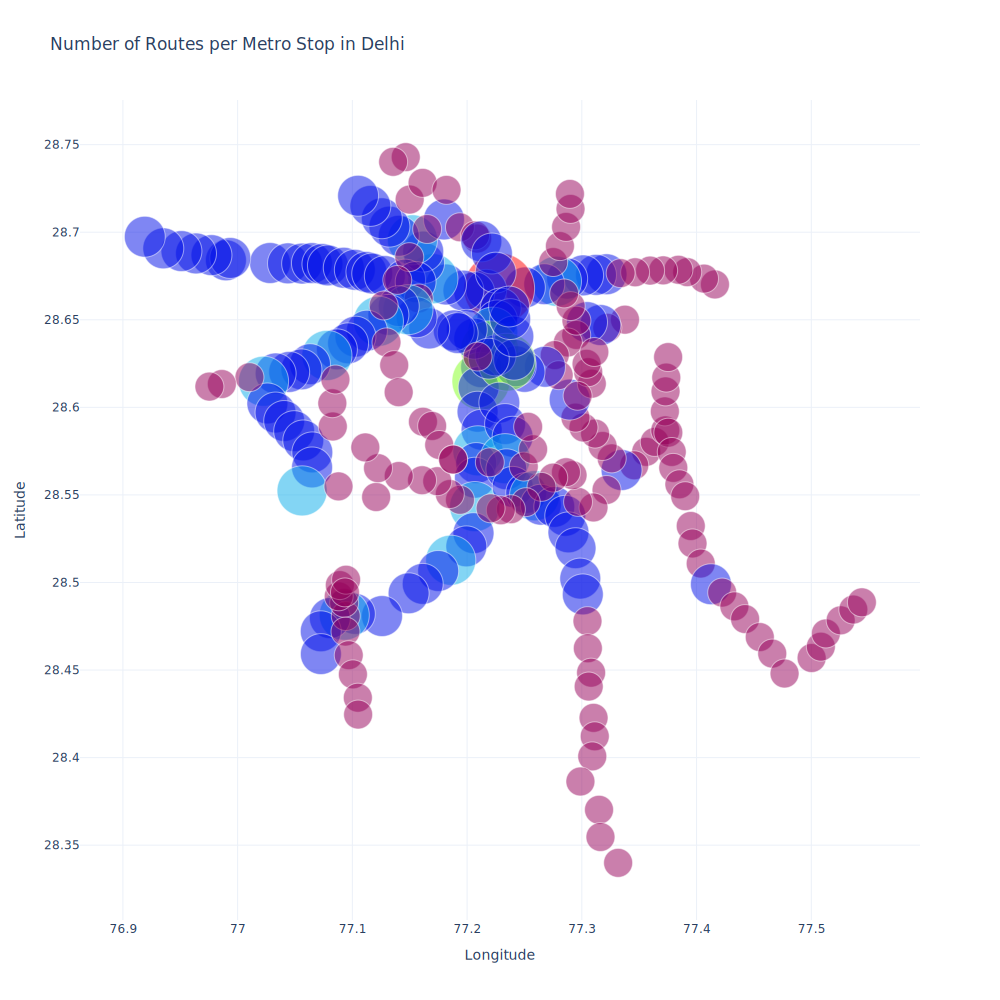

In [26]:
# merge stops with stop_times to link each stop with trips, and then merge with trips to get route information
stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')

# count how many unique routes pass through each stop
stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stop_route_counts = stop_route_counts.rename(columns={'route_id': 'number_of_routes'})

# merge this with stops to get the names and location for plotting
stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')

fig = px.scatter(
    stop_route_counts,
    x='stop_lon',
    y='stop_lat',
    size='number_of_routes',
    color='number_of_routes',
    size_max=50,  # Controls the maximum size of the bubbles
    opacity=0.5,
    color_continuous_scale='Rainbow',  # Similar to Seaborn's 'rainbow' palette
    title='Number of Routes per Metro Stop in Delhi',
    labels={'stop_lon': 'Longitude', 'stop_lat': 'Latitude'},
)

# Update layout for additional customization
fig.update_layout(
    xaxis_title='Longitude',
    yaxis_title='Latitude',
    legend_title='Number of Routes',
    template='plotly_white',
    width=1000,
    height=1000,
    showlegend=True,
    coloraxis_showscale=False  # Removes the color bar
)

fig.show("svg")

The scatter plot above represents the number of routes that pass through each Delhi Metro stop. Stops are visualized in different colours and sizes based on the number of routes they connect, providing insights into the complexity of the network at various locations. Key observations are:

* **Hubs and Transfer Points:** Larger circles (in warmer colours) indicate stops where multiple routes intersect. These stops serve as major transfer points within the network, facilitating easier cross-city travel for passengers.
* **Distribution:** Stops with fewer routes, shown in cooler colours and smaller sizes, tend to be more peripheral or on less busy lines. The central areas and more populated zones have stops with greater connectivity.

In [27]:
# converting stop_times 'arrival_time' from string to datetime.time for easier manipulation
import datetime as dt

# function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

stop_times['arrival_time_dt'] = stop_times['arrival_time'].apply(convert_to_time)

# calculate the difference in arrival times for subsequent trips at each stop
stop_times_sorted = stop_times.sort_values(by=['stop_id', 'arrival_time_dt'])
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

# function to calculate the difference in minutes between two times
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

# drop NaN values from intervals (last trip of the day)
stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes'])

# average intervals by time of day (morning, afternoon, evening)
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

## Average Interval Between Trips by Part of Day

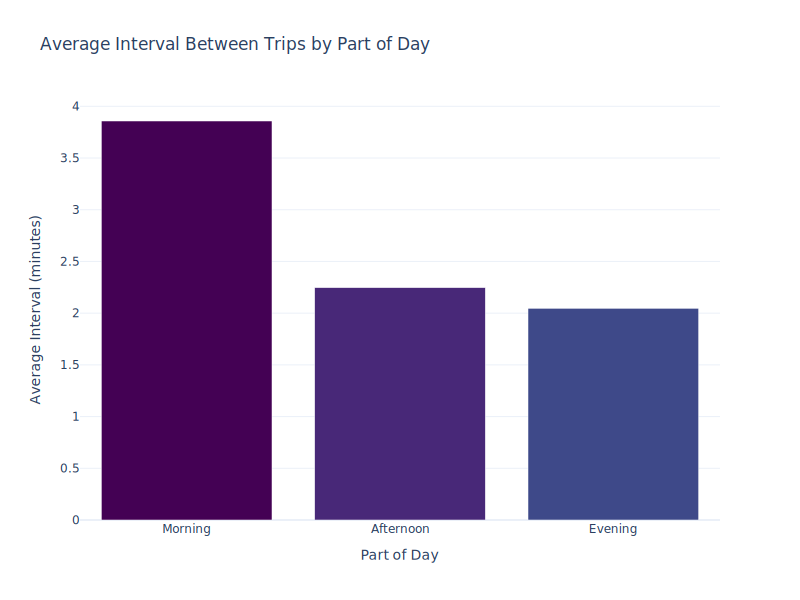

In [29]:
fig = px.bar(
    average_intervals,
    x='part_of_day',
    y='interval_minutes',
    category_orders={'part_of_day': ['Morning', 'Afternoon', 'Evening']},  # Specifies the order of categories
    color='part_of_day',
    color_discrete_sequence=px.colors.sequential.Viridis,  # Similar to the 'mako' palette
    title='Average Interval Between Trips by Part of Day',
    labels={'part_of_day': 'Part of Day', 'interval_minutes': 'Average Interval (minutes)'},
)

# Update layout for additional customization
fig.update_layout(
    xaxis_title='Part of Day',
    yaxis_title='Average Interval (minutes)',
    template='plotly_white',
    width=800,
    height=600,
    showlegend=False  # Hides the legend since color is not needed for distinction
)

fig.show("svg")

**The bar chart above displays the average interval between trips on the Delhi Metro during different parts of the day: morning, afternoon, and evening. This data provides insight into the service frequency and how it is adjusted based on the expected demand throughout the day. Key findings are:**

* **Morning**: Shorter intervals between trips are observed in the morning hours, which likely corresponds to the morning rush hour when commuters are heading to work or school.
* **Afternoon**: The intervals increase slightly during the afternoon, which may indicate a reduction in demand after the morning peak.
* **Evening**: In the evening, intervals decrease again, likely to accommodate the evening rush hour as people return home.

## Number of Trips per Time Interval

Calculate the number of trips and the available capacity per time interval. It will give us a basic understanding of how service levels vary throughout the day. We’ll classify the intervals as:

* **Early Morning:** Before 6 AM
* **Morning Peak:** 6 AM to 10 AM
* **Midday:** 10 AM to 4 PM
* **Evening Peak:** 4 PM to 8 PM
* **Late Evening:** After 8 PM

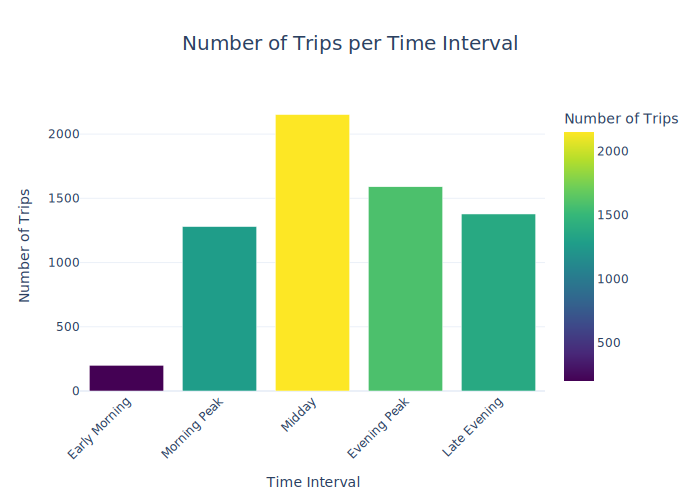

In [56]:
# define time intervals for classification
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening'

# apply time interval classification
stop_times['time_interval'] = stop_times['arrival_time_dt'].apply(classify_time_interval)

# count the number of trips per time interval
trips_per_interval = stop_times.groupby('time_interval')['trip_id'].nunique().reset_index()
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

# sorting the dataframe
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening']
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)
trips_per_interval = trips_per_interval.sort_values('time_interval')

# plotting the number of trips per time interval
fig = px.bar(
    trips_per_interval,
    x='time_interval',
    y='number_of_trips',
    color='number_of_trips',  # Adding color to enhance visual appeal
    color_continuous_scale='viridis',  # Choose a color scale
    labels={'time_interval': 'Time Interval', 'number_of_trips': 'Number of Trips'},
    title='Number of Trips per Time Interval'
)

fig.update_layout(
    xaxis_title='Time Interval',
    yaxis_title='Number of Trips',
    title_x=0.5,  # Center the title
    title_font=dict(size=20),  # Increase font size for the title
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    template='plotly_white'  # Choose a clean template
)

fig.show("svg")

**The bar chart displays the number of trips scheduled for each time interval in the Delhi Metro system. From this visualization, we can observe the following:**
* **Early Morning**: There is a relatively low number of trips, indicating less demand or fewer scheduled services during these hours.
* **Morning Peak**: There is a significant increase in the number of trips compared to the early morning, likely due to morning commute hours as people travel to work or school.
* **Midday**: The number of trips remains high, perhaps sustaining the morning rush or due to other midday travel needs.
* **Evening Peak**: This period sees a slight decrease compared to midday but remains one of the busier times, probably reflecting the evening commute.
* **Late Evening**: The number of trips drops again, but remains higher than in the early morning, likely catering to people returning home late or involved in evening activities.

## Optimized Network - Original vs Adjusted Number of Trips per Time Interval

**We’ve already analyzed the number of trips during different time intervals, which provides a clear picture of the existing supply. By cross-referencing this data with inferred demand (e.g., crowd levels observed at platforms, as actual passenger data isn’t available), adjustments can be made. For instance, if certain time intervals like the morning or evening peaks show signs of overcrowding, increasing the number of trips or adjusting the timing of the trips could help alleviate this issue.**

**Let’s start with refining the frequencies of trains during peak and off-peak hours based on the trip frequency analysis we performed earlier. I’ll create a hypothetical scenario where we adjust the frequencies during these times based on assumed passenger loads. An assumption here is that morning and evening peaks need a 20% increase in service, while midday and late evening might handle a 10% reduction without impacting passenger service negatively.**


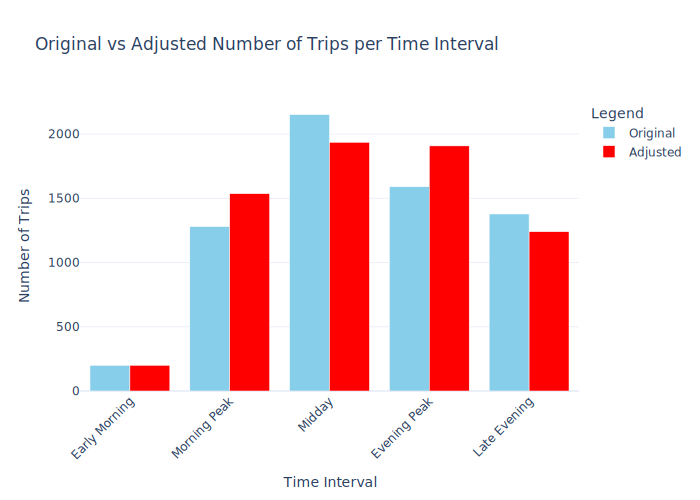

In [35]:
# adjusting frequencies based on hypothetical scenario
adjusted_trips_per_interval = trips_per_interval.copy()
adjustment_factors = {'Morning Peak': 1.20, 'Evening Peak': 1.20, 'Midday': 0.90, 'Early Morning': 1.0, 'Late Evening': 0.90}

# apply the adjustments
adjusted_trips_per_interval['adjusted_number_of_trips'] = adjusted_trips_per_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)


# Create a bar plot with Plotly Graph Objects
fig = go.Figure()

# Add original number of trips bars
fig.add_trace(go.Bar(
    x=adjusted_trips_per_interval['time_interval'],
    y=adjusted_trips_per_interval['number_of_trips'],
    name='Original',
    marker_color='Skyblue'
))

# Add adjusted number of trips bars
fig.add_trace(go.Bar(
    x=adjusted_trips_per_interval['time_interval'],
    y=adjusted_trips_per_interval['adjusted_number_of_trips'],
    name='Adjusted',
    marker_color='Red'
))

# Update layout for better presentation
fig.update_layout(
    title='Original vs Adjusted Number of Trips per Time Interval',
    xaxis_title='Time Interval',
    yaxis_title='Number of Trips',
    barmode='group',  # This groups the bars side-by-side
    xaxis_tickangle=-45,  # Rotate x-axis labels
    legend_title='Legend',
    template='plotly_white'  # Choose a clean template
)

fig.show("svg")

**The bar chart illustrates the original versus adjusted number of trips per time interval for the Delhi Metro, based on our hypothetical adjustments to better align service levels with inferred demand**

* **Morning and Evening Peaks**: We increased the number of trips by 20%, anticipating higher demand during these hours. This adjustment aims to reduce overcrowding and improve passenger comfort and service reliability.
* **Midday and Late Evening**: We decreased the trips by 10%, assuming that the demand drops during these times, allowing for more efficient use of resources without significantly impacting service quality.

-------------------------------------------------------------------------------------------------------------------------------------------

## **Contact Information**
*Please contact us for additional inquiries and collaboration opportunities.*

### **Email**

mdssohail1018@gmail.com

### **Github**
(**tsohail12**)

## ***Thank you for your time and consideration!!!***